# Лабораторна робота №7 з Видобування даних
## Оцінка та візуалізація
### Мета роботи: опрацювати етап evaluation у процесі CRISP-DM для обраної задачі 
### В рамках другої половини даного етапу потрібно створити візуалізацію свого дослідження і провести оцінку візуалізації через https://datavizchecklist.stephanieevergreen.com/
### Також якщо ви робите EDA і у вас немає робочої моделі бо ви більше займієтеся описом і дослідженням даних вам вартує зробити більше візуалізацій для презентацій


###1.Для візуалізації ми будемо використовувати бібліотеку [plotline](https://github.com/has2k1/plotnine) яка базується на [граматиці графіки ggplot](https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129). Відповідно більшість прикладів і функцій ggplot тут також є робочі

In [0]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model

url = 'https://raw.githubusercontent.com/AndrewVoisovych/DataMiningLabs/master/understat.com.csv'
dataset = pd.read_csv(url)

dataset = dataset[['сhampionship', 'season','matches','position', 'team', 'wins', 'loses', 'draws', 'scored', 'xG', 'deep', 'deep_allowed' , 'xG_diff', 'missed', 'xGA','pts','xpts', 'xpts_diff']]
dataset = dataset.drop(dataset[dataset['сhampionship'] == 'RFPL'].index)


X = dataset[['deep', 'deep_allowed', 'xG']]
#X = pd.get_dummies(data = X)
y = dataset['pts'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regression = linear_model.ARDRegression()
regression.fit(X_train, y_train)
predicted = regression.predict(X_test)

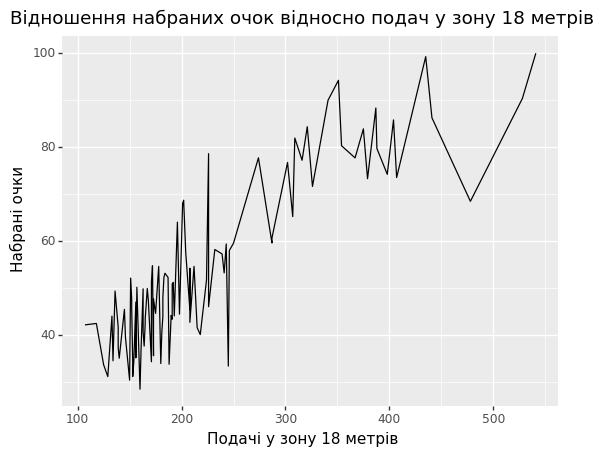

<ggplot: (-9223363268764106268)>

In [0]:
import numpy as np
from plotnine import *
%matplotlib inline

(ggplot(X_test)
  + aes(x='deep', y=predicted)
  + geom_line()
  + labs(y='Набрані очки', x="Подачі у зону 18 метрів", title="Відношення набраних очок відносно подач у зону 18 метрів")
)

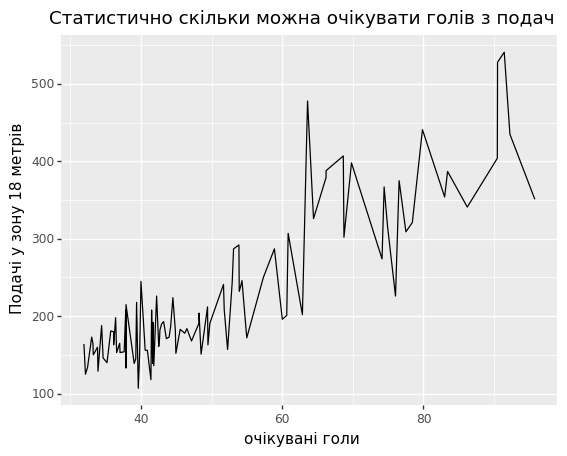

<ggplot: (-9223363268767887868)>

In [0]:
(ggplot(X_test)
  + aes(x='xG', y= 'deep')
  + geom_line()
  + labs(y='Подачі у зону 18 метрів', x="очікувані голи", title="Статистично скільки можна очікувати голів з подач")
)

###2.Виконайте візуалізацію ваших знахідок / інсайтів / прогнозувань


In [0]:
# import plotly 
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.tools as tls

league = dataset[dataset['season'] > 2017]

trace0 = go.Scatter(
    x = league['pts'][league['сhampionship'] == 'EPL'], 
    y = league['xG'][league['сhampionship'] == 'EPL'],
    name = 'EPL',
    mode = 'lines+markers'
)

trace1 = go.Scatter(
    x = league['pts'][league['сhampionship'] == 'La_liga'], 
    y = league['xG'][league['сhampionship'] == 'La_liga'],
    name = 'La_liga',
    mode = 'lines+markers'
)

trace2 = go.Scatter(
    x = league['pts'][league['сhampionship'] == 'Bundesliga'], 
    y = league['xG'][league['сhampionship'] == 'Bundesliga'],
    name = 'Bundesliga',
    mode = 'lines+markers'
)

trace3 = go.Scatter(
    x = league['pts'][league['сhampionship'] == 'Serie_A'], 
    y = league['xG'][league['сhampionship'] == 'Serie_A'],
    name = 'Serie_A',
    mode = 'lines+markers'
)


data = [trace0, trace1, trace2, trace3]

layout = go.Layout(
    title="Співідношення набраних очків відносно очікуваних голів, по лігах",
    xaxis={'title': 'набрані очки'},
    yaxis={'title': "очікувані голи",
    }
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

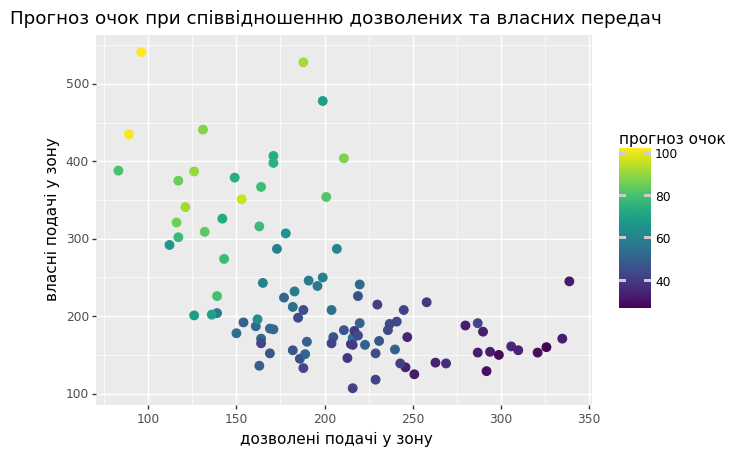

<ggplot: (-9223363268768362657)>

In [0]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

(ggplot(X_test)
 + aes(x='deep_allowed', y='deep', color='predicted')
 + labs(color='прогноз очок') 
 + geom_point(size = 3)
 + labs(title='Прогноз очок при співвідношенню дозволених та власних передач', x='дозволені подачі у зону', y='власні подачі у зону')
)

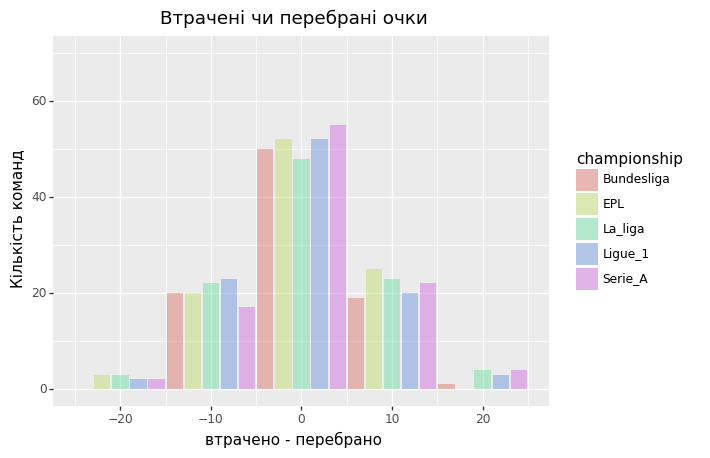

<ggplot: (8768085167680)>

In [283]:
ggplot(dataset, aes(x = 'xpts_diff', fill = 'сhampionship')) +\
  ylim(0,70) +\
  geom_histogram(binwidth = 10, alpha = .4, position = "dodge2") +\
  labs(y='Кількість команд', x='втрачено - перебрано', title='Втрачені чи перебрані очки')

###3. Завантажте вашу візуалізацію на [datavizchecklist](https://datavizchecklist.stephanieevergreen.com/) та пройдіть оцінювання.Залиште посилання на оцінку вашої візуалізації :(приклад - https://datavizchecklist.stephanieevergreen.com/view/5e701a6bd1c67 ) 

In [0]:
https://datavizchecklist.stephanieevergreen.com/view/5e86a4fa37cdc?hidenav=true
https://datavizchecklist.stephanieevergreen.com/view/5e86a526a1dd7?hidenav=true
https://datavizchecklist.stephanieevergreen.com/view/5e86a54c42d76?hidenav=true
https://datavizchecklist.stephanieevergreen.com/view/5e86a5871f2fd?hidenav=true